In [153]:
import glob
import pickle
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.approximation.independent_set import maximum_independent_set

from utils.graph_funcs import graph_from_file
from utils.helper_funcs import hamming_weight

In [155]:
onlinemis_N20 = 1.082142857142857
onlinemis_N60 = 1.1055965817596252
onlinemis_N100 = 1.0992965435797255

In [27]:
def get_pickles(N, graph_type, graph_val, npm, verbose=0):
    
    retval = []
    
    base_path = 'benchmark_results/QLS_N{}_{}{}_graphs/'.format(N, graph_type, graph_val)
    if verbose:
        print('base path:', base_path)
    
    graph_dirs = glob.glob(base_path + 'NPM_{}/*'.format(npm))
    graph_dirs = sorted(graph_dirs, key=lambda fn: int(fn.split('/')[-1].strip('G')))
    
    for gd in graph_dirs:
        if verbose:
            print(gd)
        all_reps = glob.glob(gd+'/*')
        
        graphfn = 'benchmark_graphs/N{}_{}{}_graphs/{}.txt'.format(N, graph_type, graph_val,
                                                                   gd.split('/')[-1])
        G = graph_from_file(graphfn)
        graph_name = 'N{}_{}{}_{}'.format(N, graph_type, graph_val, gd.split('/')[-1])

        bh_mis = len(maximum_independent_set(G))
        
        temp_pickles = []
        for pklfile in all_reps:
            with open(pklfile, 'rb') as pf:
                res = pickle.load(pf)
                temp_pickles.append((pklfile.split('_')[-1].strip('.pickle'), res['out']))

        # after collecting reps for this graph, store the results
        retval.append((G, bh_mis, temp_pickles, graph_name))
            
    return retval

In [26]:
def plot_qls_approxs(data, savedir=None, show=True, verbose=0):
    
    G, bh_mis, outs, graph_name = data
    if verbose:
        print(graph_name)
        print('\tBoppana-Halldorsson MIS =', bh_mis)
    
    fig, ax = plt.subplots(dpi=150)

    outs = sorted(outs, key=lambda tup: int(tup[0].strip('rep')))
    for r, (rep, out) in enumerate(outs):
        qls_mis, history = out
        
        if verbose > 0:
            print('\t{}: QLS MIS = {}, {} iterations'.format(rep, hamming_weight(qls_mis), len(history)))
        
        x_vals, y_vals = [], []
        for i, iteration in enumerate(history):
            x_vals.append(i+1)
            approximation_ratio = abs(hamming_weight(iteration[-1]) / bh_mis)
            y_vals.append(approximation_ratio)

        ax.plot(x_vals, y_vals, alpha=0.3, label=rep)
        ax.scatter(x_vals, y_vals, alpha=0.3, s=20)
        
    ax.axhline(y=1, ls='--', c='k', alpha=0.2)

    ax.set_title('QLS on {}'.format(graph_name))
    ax.set_ylabel('Boppana-Halldorsson Approximation Ratio')
    ax.set_xlabel('Iteration')
    ax.legend()
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + graph_name + '.png')
        
    if show:
        plt.show()
    plt.close()
    
    #if len(iterations_to_opt) > 0:
    #    retval = np.mean(iterations_to_opt)
    #else:
    #    retval = None
    #return retval

In [39]:
data = get_pickles(20, 'd', 3, 5, verbose=1)

base path: benchmark_results/QLS_N20_d3_graphs/
benchmark_results/QLS_N20_d3_graphs/NPM_5/G1
benchmark_results/QLS_N20_d3_graphs/NPM_5/G2
benchmark_results/QLS_N20_d3_graphs/NPM_5/G3
benchmark_results/QLS_N20_d3_graphs/NPM_5/G4
benchmark_results/QLS_N20_d3_graphs/NPM_5/G5
benchmark_results/QLS_N20_d3_graphs/NPM_5/G6
benchmark_results/QLS_N20_d3_graphs/NPM_5/G7
benchmark_results/QLS_N20_d3_graphs/NPM_5/G8
benchmark_results/QLS_N20_d3_graphs/NPM_5/G9
benchmark_results/QLS_N20_d3_graphs/NPM_5/G10
benchmark_results/QLS_N20_d3_graphs/NPM_5/G11
benchmark_results/QLS_N20_d3_graphs/NPM_5/G12
benchmark_results/QLS_N20_d3_graphs/NPM_5/G13
benchmark_results/QLS_N20_d3_graphs/NPM_5/G14
benchmark_results/QLS_N20_d3_graphs/NPM_5/G15
benchmark_results/QLS_N20_d3_graphs/NPM_5/G16
benchmark_results/QLS_N20_d3_graphs/NPM_5/G17
benchmark_results/QLS_N20_d3_graphs/NPM_5/G18
benchmark_results/QLS_N20_d3_graphs/NPM_5/G19
benchmark_results/QLS_N20_d3_graphs/NPM_5/G20


20
N20_d3_G1
	Boppana-Halldorsson MIS = 8
	rep1: QLS MIS = 7, 4 iterations
	rep2: QLS MIS = 8, 4 iterations
	rep3: QLS MIS = 8, 4 iterations
	rep4: QLS MIS = 8, 4 iterations
	rep5: QLS MIS = 7, 4 iterations
	rep6: QLS MIS = 7, 3 iterations
	rep7: QLS MIS = 7, 3 iterations
	rep8: QLS MIS = 7, 4 iterations
	rep9: QLS MIS = 8, 4 iterations
	rep10: QLS MIS = 8, 4 iterations


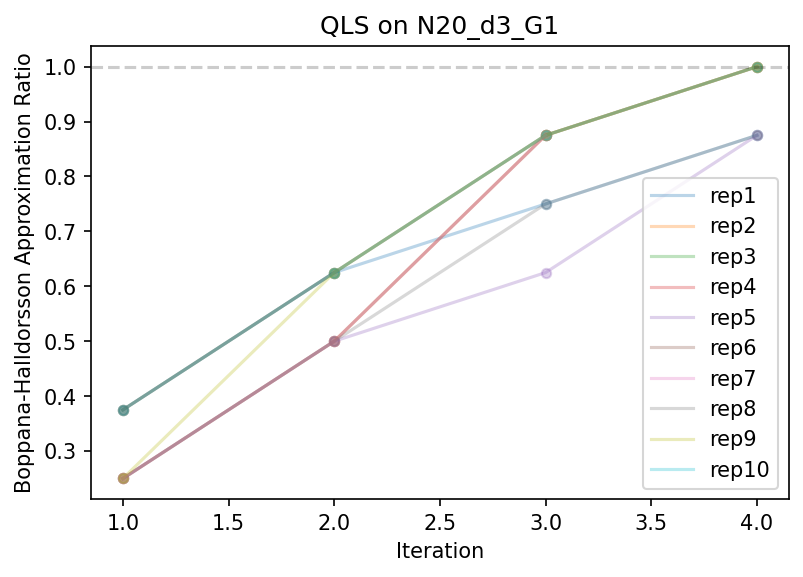

In [40]:
print(len(data))
plot_qls_approxs(data[0], verbose=1)

In [25]:
for N in [20, 60, 100]:
    data = get_pickles(N, 'd', 3, 5)
    savedir = 'figures/N{}_d3_QLS_iterations/'.format(N)
    for dat in data:
        plot_qls_approxs(dat, savedir=savedir, show=False, verbose=0)

base path: benchmark_results/QLS_N20_d3_graphs/
benchmark_results/QLS_N20_d3_graphs/NPM_5/G1
benchmark_results/QLS_N20_d3_graphs/NPM_5/G2
benchmark_results/QLS_N20_d3_graphs/NPM_5/G3
benchmark_results/QLS_N20_d3_graphs/NPM_5/G4
benchmark_results/QLS_N20_d3_graphs/NPM_5/G5
benchmark_results/QLS_N20_d3_graphs/NPM_5/G6
benchmark_results/QLS_N20_d3_graphs/NPM_5/G7
benchmark_results/QLS_N20_d3_graphs/NPM_5/G8
benchmark_results/QLS_N20_d3_graphs/NPM_5/G9
benchmark_results/QLS_N20_d3_graphs/NPM_5/G10
benchmark_results/QLS_N20_d3_graphs/NPM_5/G11
benchmark_results/QLS_N20_d3_graphs/NPM_5/G12
benchmark_results/QLS_N20_d3_graphs/NPM_5/G13
benchmark_results/QLS_N20_d3_graphs/NPM_5/G14
benchmark_results/QLS_N20_d3_graphs/NPM_5/G15
benchmark_results/QLS_N20_d3_graphs/NPM_5/G16
benchmark_results/QLS_N20_d3_graphs/NPM_5/G17
benchmark_results/QLS_N20_d3_graphs/NPM_5/G18
benchmark_results/QLS_N20_d3_graphs/NPM_5/G19
benchmark_results/QLS_N20_d3_graphs/NPM_5/G20
N20_d3_G1
	Boppana-Halldorsson MIS = 8
N2

In [161]:
def avg_all_graphs_all_reps(all_data, N, graph_type, graph_val, verbose=0, extra_data=None):
    fig, ax = plt.subplots(dpi=150)
    
    # For each set of data with NPM = k
    for (npm, data) in all_data:
        if verbose:
            print('NPM', npm, ',', len(data), 'graphs')
        all_graph_y_vals = []
        # For each graph within that data set
        for (G, bh_mis, outs, graph_name) in data:
            if verbose:
                print(graph_name, ',', len(outs), 'reps')
            all_rep_y_vals = []
            # For each repetition on each graph
            for (rep, out) in outs:
                qls_mis, history = out
                temp_y_vals = []
                # For each iteration within every repetition
                for iteration in history:
                    approximation_ratio = abs(hamming_weight(iteration[-1]) / bh_mis)
                    temp_y_vals.append(approximation_ratio)
                all_rep_y_vals.append((hamming_weight(qls_mis) / bh_mis, temp_y_vals))
            
            # Once all the reps have been collected, take the best repetition
            all_graph_y_vals.append(sorted(all_rep_y_vals, key=lambda tup: tup[0])[-1][1])
        
        # Once all the graphs have been collected, average over them
        max_iters = max([len(graph) for graph in all_graph_y_vals])
        avg_y_vals = []
        std_y_vals = []
        for i in range(max_iters):
            cur_iter_vals = []
            for graph in all_graph_y_vals:
                if i < len(graph):
                    cur_iter_vals.append(graph[i])
            avg_y_vals.append(np.mean(cur_iter_vals))
            std_y_vals.append(np.std(cur_iter_vals))
            
        # After all the data has been averaged, plot the results
        label = 'num_partial_mixers = {}'.format(npm)
        xvals = np.arange(1, len(avg_y_vals)+1)
        ax.errorbar(xvals, avg_y_vals, label=label, fmt='-o', ms=4)

        y1 = [m+s for m, s in zip(avg_y_vals, std_y_vals)]
        y2 = [m-s for m, s in zip(avg_y_vals, std_y_vals)]
        ax.fill_between(xvals, y1, y2, alpha=0.2)
    
    if extra_data is not None:
        for (label, val) in extra_data:
            ax.axhline(y=val, ls='--', alpha=0.4, label=label)
        
    ax.axhline(y=1, ls='--', c='k', alpha=0.2)
    ax.legend()
    ax.set_ylabel('Boppana-Halldorsson Approximation Ratio')
    ax.set_xlabel('Iteration')
    ax.set_title('Avg QLS performance N{}_{}{}_graphs'.format(N, graph_type, graph_val))

In [157]:
all_data = []
N = 20
graph_type = 'd'
graph_val = 3
for npm in [2, 3, 4, 5, 6, 8, 10]:
    all_data.append((npm, get_pickles(N, graph_type, graph_val, npm)))

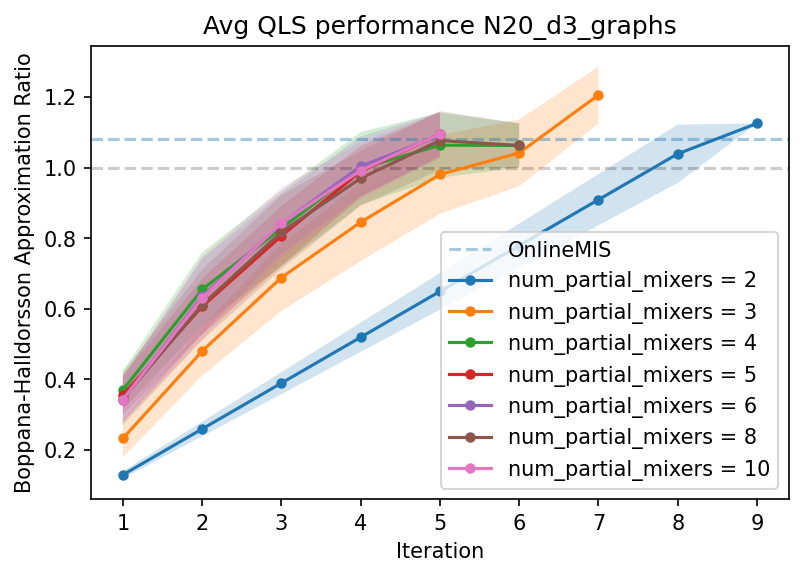

In [162]:
avg_all_graphs_all_reps(all_data, N, graph_type, graph_val, extra_data=[('OnlineMIS', onlinemis_N20)])

In [163]:
all_data = []
N = 60
graph_type = 'd'
graph_val = 3
for npm in [2, 3, 4, 5, 6, 8, 10]:
    all_data.append((npm, get_pickles(N, graph_type, graph_val, npm)))

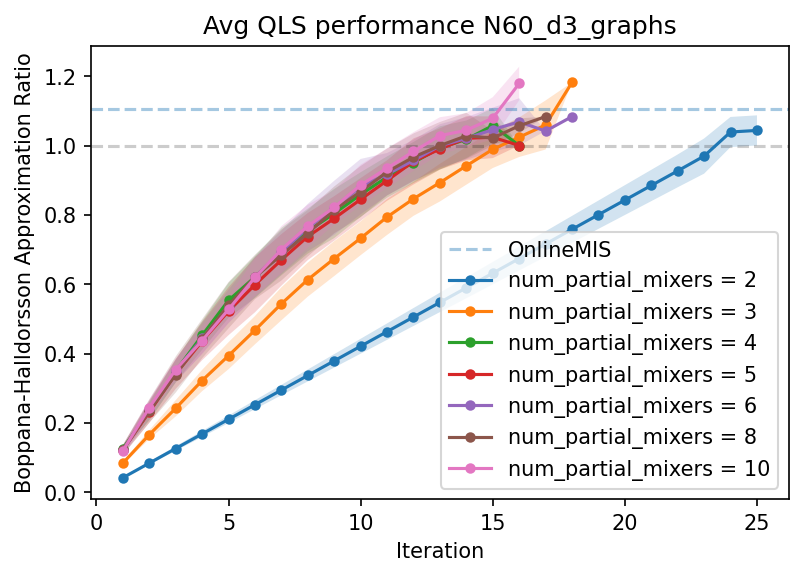

In [164]:
avg_all_graphs_all_reps(all_data, N, graph_type, graph_val, extra_data=[('OnlineMIS', onlinemis_N60)])

In [165]:
all_data = []
N = 100
graph_type = 'd'
graph_val = 3
for npm in [2, 3, 4, 5, 6, 8, 10]:
    all_data.append((npm, get_pickles(N, graph_type, graph_val, npm)))

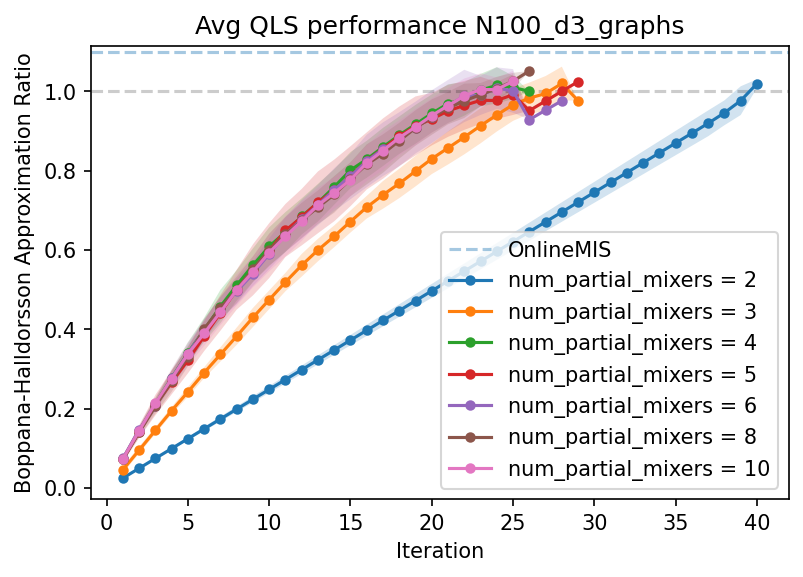

In [166]:
avg_all_graphs_all_reps(all_data, N, graph_type, graph_val, extra_data=[('OnlineMIS', onlinemis_N100)])

In [169]:
def mis_performance(all_data, graph_type, graph_val, verbose=0, extra_data=None):
    fig, ax = plt.subplots(dpi=150)
    
    for (N, cur_data) in all_data:
        avg_y_vals = []
        std_y_vals = []
        x_vals = []
        # For each set of data with NPM = k
        for (npm, data) in cur_data:
            if verbose:
                print('NPM', npm, ',', len(data), 'graphs')
            all_graph_y_vals = []
            # For each graph within that data set
            for (G, bh_mis, outs, graph_name) in data:
                if verbose:
                    print(graph_name, ',', len(outs), 'reps')
                all_rep_y_vals = []
                # For each repetition on each graph
                for (rep, out) in outs:
                    qls_mis, history = out
                    all_rep_y_vals.append(hamming_weight(qls_mis) / bh_mis)

                # Once all the reps have been collected, take the best rep
                all_graph_y_vals.append(np.max(all_rep_y_vals))

            # Once all the graphs have been collected, average over them
            avg_y_vals.append(np.mean(all_graph_y_vals))
            std_y_vals.append(np.std(all_graph_y_vals))
            x_vals.append(npm)

        # After all the data has been averaged, plot the results
        ax.errorbar(x_vals, avg_y_vals, fmt='-o', ms=4, label='N = {}'.format(N))

        y1 = [m+s for m, s in zip(avg_y_vals, std_y_vals)]
        y2 = [m-s for m, s in zip(avg_y_vals, std_y_vals)]
        ax.fill_between(x_vals, y1, y2, alpha=0.2)
        
    if extra_data is not None:
        for (label, val) in extra_data:
            ax.axhline(y=val, ls='--', alpha=0.4, label=label)
    
    ax.axhline(y=1, ls='--', c='k', alpha=0.2)
    ax.legend()
    ax.set_ylabel('Boppana-Halldorsson Approximation Ratio')
    ax.set_xlabel('Number of Partial Mixers')
    ax.set_title('Avg QLS performance on {}-regular graphs'.format(graph_val))

In [168]:
all_data = []
graph_type = 'd'
graph_val = 3
for N in [20, 60, 100]:
    temp_data = []
    for npm in [2, 3, 4, 5, 6, 8, 10]:
        temp_data.append((npm, get_pickles(N, graph_type, graph_val, npm)))
    all_data.append((N, temp_data))

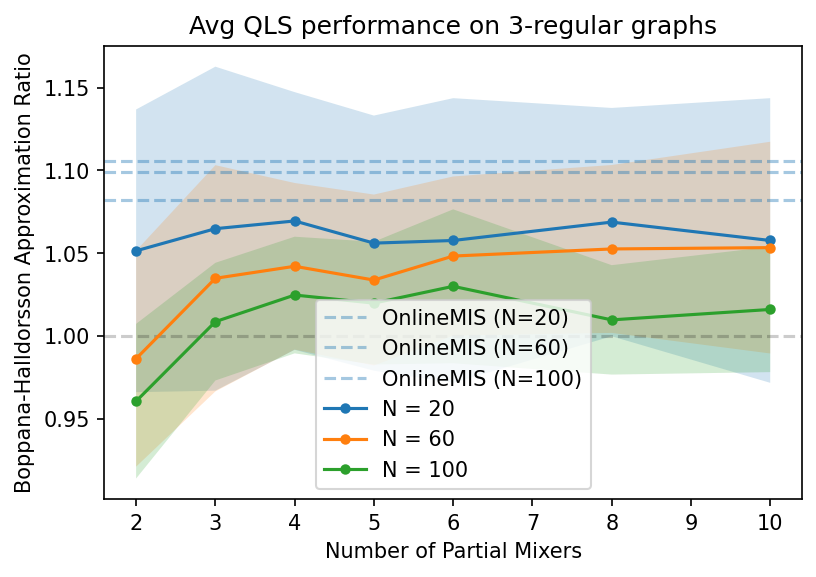

In [170]:
mis_performance(all_data, graph_type, graph_val, extra_data=[('OnlineMIS (N=20)', onlinemis_N20),
                                                             ('OnlineMIS (N=60)', onlinemis_N60),
                                                             ('OnlineMIS (N=100)', onlinemis_N100)])

In [142]:
def plot_npm(all_data):
    fig, ax = plt.subplots(dpi=150)
    
    plot_dict = {}
    all_npm_vals = []
    for (N, ndata) in all_data:
        #print('Num nodes:', N)
        cur_N_dict = {}
        for (npm, pdata) in ndata:
            all_npm_vals.append(npm)
            #print('\tNum partial mixers:', npm)
            temp_avg_npm = []
            for gdata in pdata:
                G, bh_mis, outs, graph_name = gdata
                #print('\t\t', graph_name)
                
                temp_reps = []
                # For each repetition on each graph
                for (rep, out) in outs:
                    qls_mis, history = out
                    # record the final approximation ratio and the number of partial mixers at every iteration
                    temp_reps.append(((hamming_weight(qls_mis) / bh_mis), [len(itr[5]) for itr in history]))

                # Once all the reps have been collected, compute the average number of partial mixers for the best repetition
                best_rep = sorted(temp_reps, key=lambda tup: tup[0])[-1][1]
                temp_avg_npm.append(np.mean(best_rep))
            
            # After all graphs at this NPM have been collected, average them
            cur_N_dict[npm] = np.mean(temp_avg_npm)
        
        # Once all NPM's have been collected, save the results
        plot_dict[N] = cur_N_dict
    
    # Once all N values have been collected, plot!
    all_npm_vals = list(set(all_npm_vals))
    xlabels = list(plot_dict.keys())
    xvals = np.arange(1, len(plot_dict.keys()) + 1)
    width = 0.1
    offset = len(all_npm_vals) // 2 * width
    for i, npm_val in enumerate(all_npm_vals):
        yvals = [plot_dict[N][npm_val] for N in xlabels]
        cur_xvals = [xx - offset + i*width for xx in xvals]
        ax.bar(cur_xvals, yvals, label='NPM Limit = {}'.format(npm_val), width=width)

        
    ax.legend(fontsize='small', loc='lower right')
    ax.set_xticks(xvals)
    ax.set_xticklabels(xlabels)
    ax.set_ylabel('Avg Number of Partial Mixers')
    ax.set_xlabel('Graph Size, N')
    ax.set_title('Avg NPM for QLS on 3-regular graphs')

In [93]:
all_data = []
graph_type = 'd'
graph_val = 3
for N in [20, 60, 100]:
    temp_data = []
    for npm in [2, 3, 4, 5, 6, 8, 10]:
        temp_data.append((npm, get_pickles(N, graph_type, graph_val, npm)))
    all_data.append((N, temp_data))

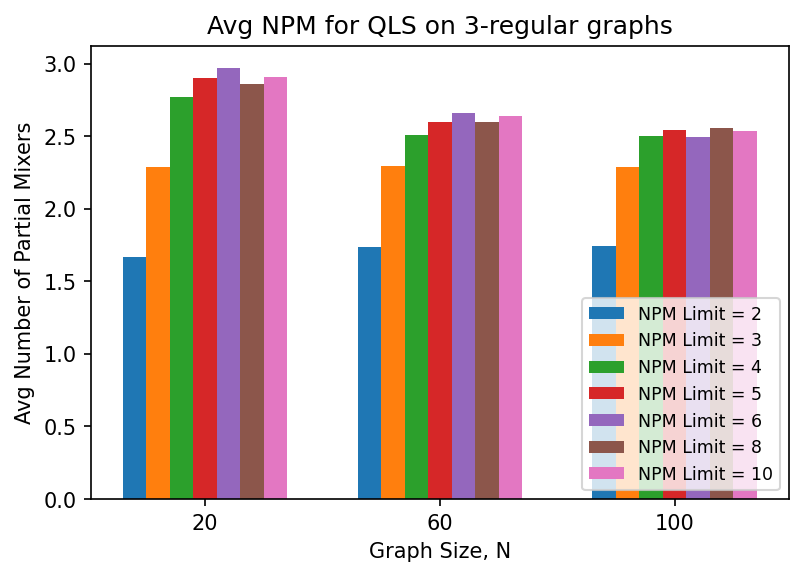

In [143]:
plot_npm(all_data)